<a href="https://colab.research.google.com/github/icarocnunes/desafioPythonDIO/blob/main/desafioPythonDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Desafio: Python para análise de dados <em>(Digital Innovation One)</em></strong> - Ícaro Cazé Nunes</h1>

<h2>1 - Carregando as bibliotecas e os arquivos: </h2>

In [39]:
# 1.1. Importando as bibliotecas necessárias:

# 1.1.1 Biblioteca Pandas:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# 1.2. Carregando os dados de cada um dos arquivos:

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

# 1.2.1. Carregando todos os arquivos em um único data frame:

df = pd.concat([df1,df2,df3,df4,df5])



<h2>2 - Análise inical (compreendedo os dados): </h2>

In [41]:
# 2.1. Analisando a consistência dos dados:

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
77,Fortaleza,2019-01-01,167.64,1005,1
121,Aracaju,2018-01-01,162.07,1520,3
104,Recife,2019-01-01,40.11,983,5
129,Recife,2019-03-02,35.34,982,7
99,Aracaju,2018-01-01,139.32,1521,3
56,Natal,2018-03-02,704.00,852,4
159,Natal,2019-01-02,172.52,1035,1
174,Natal,2019-01-02,35.30,1037,1
102,Recife,2019-01-01,96.50,982,7
2,Natal,2019-03-11,308.00,852,3


In [42]:
# 2.2. Analisando os tipos de dados para cada uma das variáveis:

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [43]:
# 2.3. Mensurando os dados faltantes no conjunto de dados:

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [44]:
# 2.4. Definindo uma métrica para mensurar as vendas:

df["Receita"] = df["Vendas"].mul(df["Qtde"])

# 2.4.1. Avaliando a nova métrica:

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
107,Salvador,2019-01-01,14.70,1035,1,14.70
139,Natal,2019-01-02,169.01,1036,1,169.01
222,Natal,2019-01-02,43.96,1037,1,43.96
2,Recife,2019-02-10,12.94,983,5,64.70
55,Fortaleza,2019-01-01,214.73,1002,4,858.92
204,Natal,2019-01-02,151.41,1037,2,302.82
39,Recife,2019-01-01,143.58,981,3,430.74
30,Aracaju,2018-01-01,119.21,1520,8,953.68
23,Salvador,2019-01-01,193.20,1036,3,579.60
129,Recife,2019-03-02,35.34,982,7,247.38


In [45]:
# 2.5. Avaliando as receitas por cidade e ano:

df.groupby(["Cidade",df["Data"].dt.year])["Receita"].sum()

Cidade     Data
Aracaju    2018    46276.29
           2019     2471.96
Fortaleza  2019    37913.97
Natal      2018    71750.00
           2019    95477.52
Recife     2019    51936.51
Salvador   2018      150.24
           2019    40446.49
Name: Receita, dtype: float64

In [46]:
# 2.6. Aumentando a granularidade das analises ao longo do tempo:

# 2.6.1. Definindo o ano como uma nova variável (independente):

df["anoVenda"] = df["Data"].dt.year

# 2.6.2. Definindo o mês e o dia em novas variáveis:

df["mesVenda"], df["diaVenda"] = (df["Data"].dt.month, df["Data"].dt.day)

# 2.6.3. Definindo o trimestre como uma nova variável:

df["trimestreVenda"] = df["Data"].dt.quarter

# 2.6.4. Verificando as novas variáveis do conjunto de dados:

df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,anoVenda,mesVenda,diaVenda,trimestreVenda
60,Recife,2019-01-01,37.97,983,1,37.97,2019,1,1,1
165,Natal,2019-01-02,11.54,1037,1,11.54,2019,1,2,1
71,Aracaju,2018-01-01,228.27,1523,6,1369.62,2018,1,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,1
122,Aracaju,2018-01-01,38.49,1522,4,153.96,2018,1,1,1
40,Aracaju,2018-01-01,6.99,1522,7,48.93,2018,1,1,1
66,Recife,2019-01-01,14.59,983,7,102.13,2019,1,1,1
37,Recife,2019-01-01,136.36,980,7,954.52,2019,1,1,1
5,Salvador,2019-01-01,179.20,1037,3,537.60,2019,1,1,1
54,Aracaju,2018-01-01,20.85,1523,1,20.85,2018,1,1,1


In [47]:
# 2.7. Avaliando as receitas pela cidade, ano e trimestre:

df.groupby(["Cidade","anoVenda","trimestreVenda"])["Receita"].sum()

Cidade     anoVenda  trimestreVenda
Aracaju    2018      1                 46276.29
           2019      1                  2471.96
Fortaleza  2019      1                 37913.97
Natal      2018      1                 25088.00
                     2                 23382.00
                     3                 11658.00
                     4                 11622.00
           2019      1                 89211.52
                     2                  6266.00
Recife     2019      1                 51936.51
Salvador   2018      1                   150.24
           2019      1                 40446.49
Name: Receita, dtype: float64

<h2>3 - Análise Exploratória de Dados (EDA): </h2>

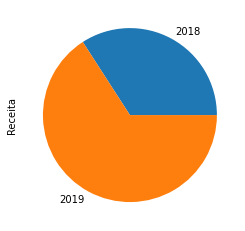

In [35]:
# 3.1. Analisando a receita por ano:

df.groupby("anoVenda")["Receita"].sum().plot.pie()

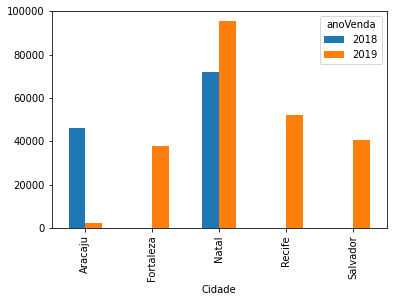

In [74]:
# 3.2. Analisando a receita por ano e por cidade:

df.groupby(['Cidade','anoVenda'])["Receita"].sum().unstack().plot.bar()


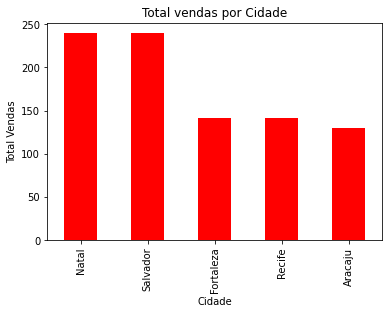

In [86]:
# 3.3. Analisando o total de vendas por cidade:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

#df.groupby(['LojaID','Cidade'])['Qtde'].count().unstack().plot.bar()





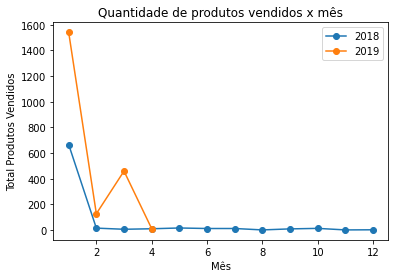

In [97]:
# 3.4. Total produtos vendidos por mês:

df.groupby(["mesVenda","anoVenda"])["Qtde"].sum().unstack().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();